In [14]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='serif'
matplotlib.rcParams['text.usetex'] = True
from tqdm import tqdm

In [7]:
nmssmDF = pd.read_csv('/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/sampling_points_expressions_1703p07800.csv')
nmssmDF.head(3)

,tb,M,mA,n,lam,s11,s22,s33
0,1,1000,0,0,0.01,-5648.544306,10478.717318,5949.583101
1,1,1000,0,0,0.11,-74672.292979,78550.099464,6901.949628
2,1,1000,0,0,0.21,-143742.759282,148582.004552,5940.510843


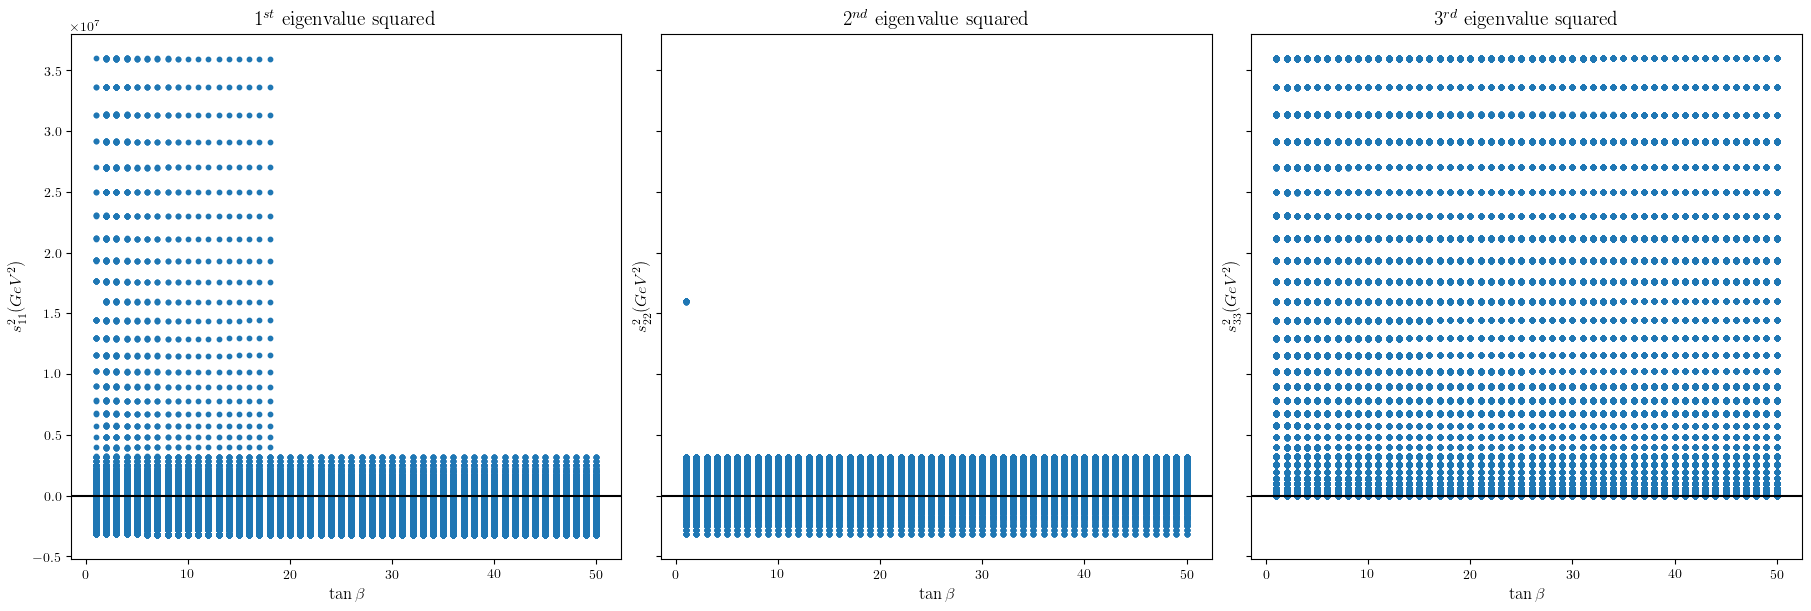

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, constrained_layout=True)

scatter1 = axes[0].scatter(nmssmDF['tb'], nmssmDF['s11'],s=10)
axes[0].set_title(r'$1^{st}$ eigenvalue squared', fontsize=14)
axes[0].set_xlabel(r'$\tan \beta$', fontsize=12)
axes[0].set_ylabel(r'$s_{11}^2 (GeV^2)$', fontsize=12)
axes[0].axhline(y=0, color='black')

scatter2 = axes[1].scatter(nmssmDF['tb'], nmssmDF['s22'],s=10)
axes[1].set_title(r'$2^{nd}$ eigenvalue squared', fontsize=14)
axes[1].set_xlabel(r'$\tan \beta$', fontsize=12)
axes[1].set_ylabel(r'$s_{22}^2 (GeV^2)$', fontsize=12)
axes[1].axhline(y=0, color='black')

scatter3 = axes[2].scatter(nmssmDF['tb'], nmssmDF['s33'],s=10)
axes[2].set_title(r'$3^{rd}$ eigenvalue squared', fontsize=14)
axes[2].set_xlabel(r'$\tan \beta$', fontsize=12)
axes[2].set_ylabel(r'$s_{33}^2 (GeV^2)$', fontsize=12)
axes[2].axhline(y=0, color='black')

plt.show()


In [33]:
posDF = nmssmDF[(nmssmDF['s11'] >= 0) & (nmssmDF['s22'] >= 0) & (nmssmDF['s33'] >= 0)]
posDF.head(2)

,tb,M,mA,n,lam,s11,s22,s33
1400,1,1000,4000,0,0.01,3505.323463,1.600727e+07,3.0258
1401,1,1000,4000,0,0.11,3868.419441,1.600691e+07,366.1218


- From this dataframe we get that only for $tan \beta =1$ or $2$ we have all three eigenvalues positive. We also get that for $\tan \beta = 1$ we only have $m_A = 4000GeV$ and for $\tan \beta =2$ we only have $m_A=5000GeV$. 

In [74]:
np.unique(posDF[(posDF['tb'] == 2)]['lam'])

array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])

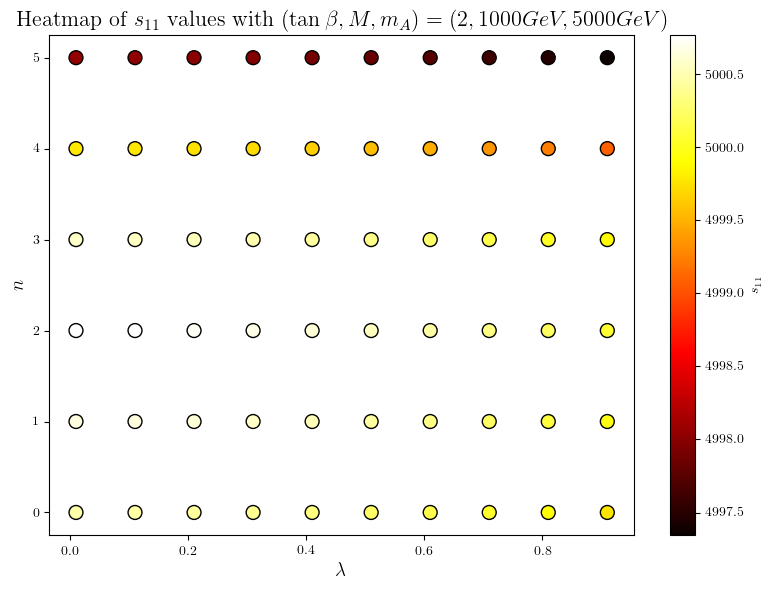

In [75]:
# heat map without interpolation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(posDF[(posDF['mA']==5000)]['lam'], posDF[(posDF['mA']==5000)]['n'], c=np.sqrt(posDF[(posDF['mA']==5000)]['s11']), cmap='hot', s=100, edgecolor='k')
plt.colorbar(scatter, label=r'$s_{11}$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$n$', fontsize=14)
plt.title(r'Heatmap of $s_{11}$ values with $(\tan\beta , M, m_A)=(2,1000GeV, 5000GeV)$', fontsize=16)

plt.tight_layout()
plt.show()

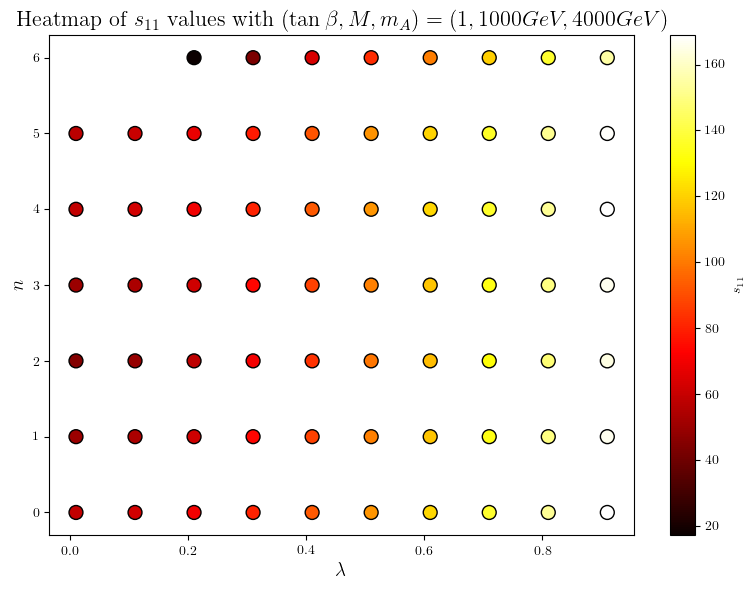

In [76]:
# heat map without interpolation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(posDF[(posDF['mA']==4000)]['lam'], posDF[(posDF['mA']==4000)]['n'], c=np.sqrt(posDF[(posDF['mA']==4000)]['s11']), cmap='hot', s=100, edgecolor='k')
plt.colorbar(scatter, label=r'$s_{11}$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$n$', fontsize=14)
plt.title(r'Heatmap of $s_{11}$ values with $(\tan\beta , M, m_A)=(1,1000GeV, 4000GeV)$', fontsize=16)

plt.tight_layout()
plt.show()